In [86]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal
from scipy import stats
import seaborn as sns
sns.set_context('paper')
import os

In [62]:
!curl -LJO https://github.com/danielbabin/Zircon_Standards/raw/master/Results/Results_91500_Reduce.csv
!curl -LJO https://github.com/danielbabin/Zircon_Standards/raw/master/Results/Results_Ples_Reduce.csv
!curl -LJO https://github.com/danielbabin/Zircon_Standards/raw/master/Results/Results_Temora2_Reduce.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   168  100   168    0     0    743      0 --:--:-- --:--:-- --:--:--   743
100 67080  100 67080    0     0   165k      0 --:--:-- --:--:-- --:--:--  165k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   167  100   167    0     0   1091      0 --:--:-- --:--:-- --:--:--  1091
100 67190  100 67190    0     0   200k      0 --:--:-- --:--:-- --:--:--  497k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   170  100   170    0     0   1042      0 --:--:-- --:--:-- --:--:--  1042
100 62674  100 62674    0     0   157k      0 --:--:-- --:--:-- --:--:--  157k
  % Total    % Received % Xferd  Average Speed   Tim

In [63]:
reduced={}
reduced['91500']=pd.read_csv('Results_91500_Reduce.csv')
reduced['OG1']=pd.read_csv('Results_OG1_Reduce.csv')
reduced['Ples']=pd.read_csv('Results_Ples_Reduce.csv')
reduced['Temora2']=pd.read_csv('Results_Temora2_Reduce.csv')
keys=reduced.keys()

In [64]:
reduced['Ples'].columns

Index(['Label', 'Comment', 'Components', 'Shape', 'Height', 'Width',
       'Rep Rate', 'Speed', 'Angle', 'Hg202', 'Pb204', 'Pb206', 'Pb207',
       'Pb208', 'Th232', 'U238', 'U235', 'TotalBeam', 'BeamSeconds', 'Mask',
       'Hg202_CPS', 'Pb204_CPS', 'Pb206_CPS', 'Pb207_CPS', 'Pb208_CPS',
       'Th232_CPS', 'U238_CPS', 'U235_CPS', 'TotalBeam_CPS', 'Raw U/Th',
       'Hg202_CPS.1', 'Pb204_CPS.1', 'Pb206_CPS.1', 'Pb207_CPS.1',
       'Pb208_CPS.1', 'Th232_CPS.1', 'U238_CPS.1', 'U235_CPS.1',
       'TotalBeam_CPS.1', 'Pb206/U238', 'Pb206/U238 age', 'Pb207/U235',
       'Pb207/U235 age', 'Pb208/Th232', 'Pb208/Th232 age', 'DC Pb206/U238',
       'DC Pb206/U238 age', 'DC Pb207/U235', 'DC Pb207/U235 age',
       'DC Pb208/Th232', 'DC Pb208/Th232 age', 'DC Pb207/Pb206',
       'DC Pb207/Pb206 age', 'Final Pb206/U238', 'Final Pb206/U238 age',
       'Final Pb207/U235', 'Final Pb207/U235 age', 'Final Pb208/Th232',
       'Final Pb208/Th232 age', 'Final Pb207/Pb206', 'Final Pb207/Pb206 age',
  

In [65]:
λ238=1.55125E-10
λ235=9.8485E-10
λ232=4.9475E-11
time=np.linspace(0,4500000000,10000)
conchordia=pd.DataFrame(index=time)
conchordia['206/238']=np.exp(conchordia.index*λ238)-1
conchordia['207/235']=np.exp(conchordia.index*λ235)-1

In [66]:
!curl -LJO https://github.com/danielbabin/Zircon_Standards/raw/master/Supplementary%20Data/standards_composition.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   182  100   182    0     0    875      0 --:--:-- --:--:-- --:--:--   875
100  7199  100  7199    0     0  20746      0 --:--:-- --:--:-- --:--:-- 20746


# U/Pb Ratios and Ages from Literature
Compiled. Uncertainty from ages represents an age range spanned by the 235 and 238 ages. It should be noted that the uncertainty for the ages are extremely small relative to our uncertainties (factor of 10-20)

In [67]:
literature=pd.read_csv('standards_composition.csv')
literature

,Standard,206/238,2s,207/235,2s.1,207/206,2s.2,Reference,Age,Age 2s
0,FC1,0.185325,0.000183,1.944989,0.001828,0.076117,0.000017,"Mattison et al., 2010",1098.0,1.5
1,FC1,0.185197,0.000183,1.944437,0.001828,0.076148,0.000017,"Mattison et al., 2011",1098.0,1.5
2,FC1,0.185133,0.000183,1.943462,0.001828,0.076136,0.000017,"Mattison et al., 2012",1098.0,1.5
3,FC1,0.185137,0.000183,1.943079,0.001828,0.076119,0.000017,"Mattison et al., 2013",1098.0,1.5
4,FC1,0.185173,0.000183,1.943614,0.001828,0.076126,0.000017,"Mattison et al., 2014",1098.0,1.5
5,FC1,0.185042,0.000183,1.942256,0.001828,0.076126,0.000017,"Mattison et al., 2015",1098.0,1.5
6,FC1,0.185148,0.000183,1.943424,0.001828,0.076128,0.000017,"Mattison et al., 2016",1098.0,1.5
7,FC1,0.185236,0.000183,1.944160,0.001828,0.076121,0.000017,"Mattison et al., 2017",1098.0,1.5
8,FC1,0.185354,0.000183,1.945402,0.001828,0.076121,0.000017,"Mattison et al., 2018",1098.0,1.5
9,FC1,0.185243,0.000183,1.944626,0.001828,0.076137,0.000017,"Mattison et al., 2019",1098.0,1.5


# Clean Up

In [68]:
keys

dict_keys(['91500', 'OG1', 'Ples', 'Temora2'])

In [74]:
key='Ples'
df=reduced[key]
a=df[df['Label']!='Baseline']
col_list=['Label','Final Pb206/U238','Final Pb206/U238 age',
                   'Final Pb207/U235','Final Pb207/U235 age',
                   'Final Pb207/Pb206','Final Pb207/Pb206 age']
age_error=a[col_list]
ages=age_error.copy()
errors=age_error.copy()


for col in ['Final Pb206/U238','Final Pb206/U238 age',
                   'Final Pb207/U235','Final Pb207/U235 age',
                   'Final Pb207/Pb206','Final Pb207/Pb206 age']:
    ages[col]=age_error[col].str.split(' ± ').str[0]
    ages.replace('-',np.NaN,inplace=True)
    ages[col]=ages[col].astype(float)
    errors[col]=age_error[col].str.split(' ± ').str[1]
    errors.replace('-',np.NaN,inplace=True)
    errors[col]=errors[col].astype(float)

In [75]:
col_list

['Label',
 'Final Pb206/U238',
 'Final Pb206/U238 age',
 'Final Pb207/U235',
 'Final Pb207/U235 age',
 'Final Pb207/Pb206',
 'Final Pb207/Pb206 age']

# Visualize Conchordia

In [76]:
literature.columns

Index(['Standard', '206/238', '2s', '207/235', '2s.1', '207/206', '2s.2',
       'Reference', 'Age', 'Age 2s'],
      dtype='object')

In [77]:
cp=sns.color_palette(n_colors=len(ages.Label.unique()))

<IPython.core.display.Javascript object>


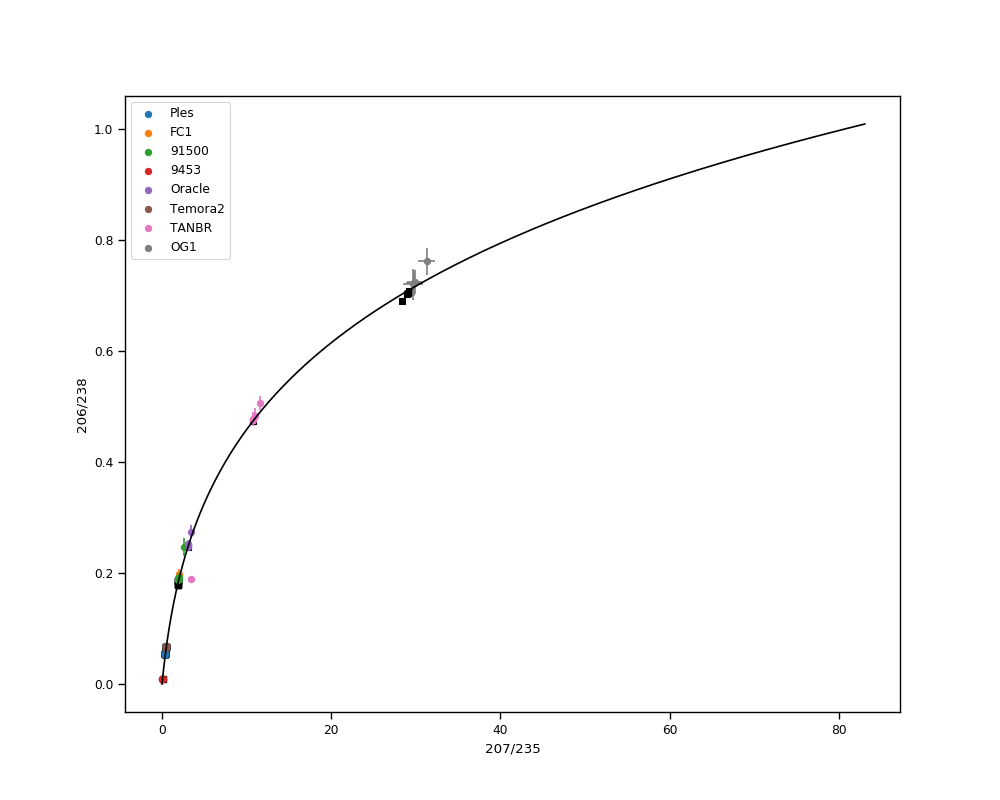

In [78]:
%matplotlib notebook
fig,ax=plt.subplots(figsize=(10,8))
ax.plot(conchordia['207/235'],conchordia['206/238'],color='k',label='Conchordia')
for i,z in enumerate(ages.Label.unique()):
    ages[ages.Label==z].plot.scatter(x='Final Pb207/U235',y='Final Pb206/U238',ax=ax,
                                     xerr=errors['Final Pb207/U235'],yerr=errors['Final Pb206/U238'],
                                    color=cp[i],label=z)
    literature[literature.Standard==z].plot.scatter(x='207/235',y='206/238',
                                                    xerr=literature['2s.1'],yerr=literature['2s'],
                                                    color='k',marker='s',ax=ax,zorder=-2)

# Visualize Age Uncertainty
Squares are 206/238 age and circles are 207/235 age. Colors are the same. Line represents age from literature

<IPython.core.display.Javascript object>


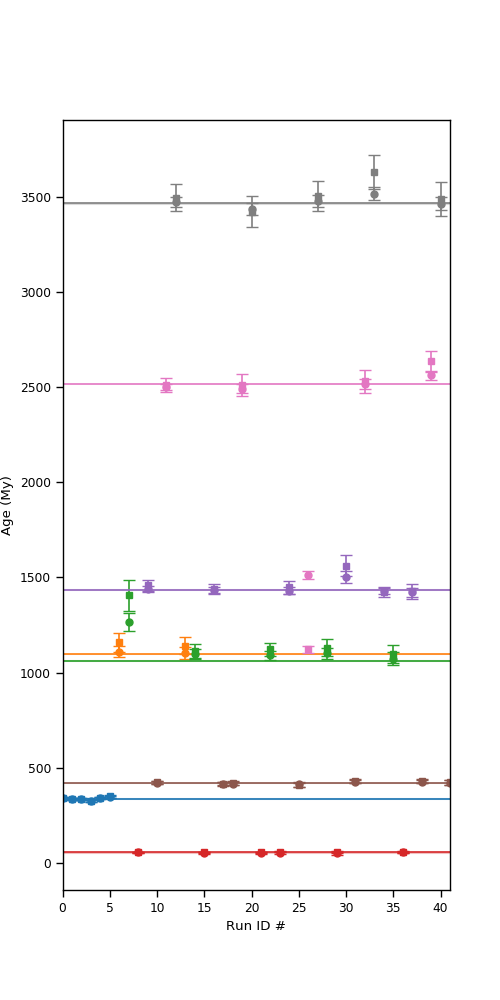

Text(0, 0.5, 'Age (My)')

In [79]:
%matplotlib notebook
fig,ax=plt.subplots(figsize=(5,10))
for i,z in enumerate(ages.Label.unique()):
    ages.loc[ages.Label==z,'Final Pb206/U238 age'].plot(ax=ax,yerr=errors['Final Pb206/U238 age'],
                                    color=cp[i],label=z,ls='',ms=5,marker='s',capsize=4)
    ages.loc[ages.Label==z,'Final Pb207/U235 age'].plot(ax=ax,yerr=errors['Final Pb207/U235 age'],
                                    color=cp[i],label=z,ls='',ms=5,marker='o',capsize=4)
    locs=literature.loc[literature['Standard']==z]
    ax.axhline(locs['Age'].mean(),color=cp[i])
    ax.axhspan(ymin=locs['Age'].mean()-locs['Age 2s'].mean(),
               ymax=locs['Age'].mean()+locs['Age 2s'].mean(),
               color=cp[i],alpha=.2)
    
ax.set_xlabel('Run ID #')
ax.set_ylabel('Age (My)')

In [28]:
errors.columns

Index(['Label', 'Final Pb206/U238', 'Final Pb206/U238 age', 'Final Pb207/U235',
       'Final Pb207/U235 age', 'Final Pb207/Pb206', 'Final Pb207/Pb206 age'],
      dtype='object')

In [80]:
errors.rename(columns={'Final Pb206/U238':'2s Final Pb206/U238','Final Pb206/U238 age':'2s Final Pb206/U238 age',
                       'Final Pb207/U235':'2s Final Pb207/U235','Final Pb207/U235 age':'2s Final Pb207/U235 age',
                       'Final Pb207/Pb206':'2s Final Pb207/Pb206','Final Pb207/Pb206 age':'2s Final Pb207/Pb206 age'},
             inplace=True)

In [81]:
literature.loc[literature['Standard']==z,['Age','Age 2s']].mean()

Age       3465.0
Age 2s       3.5
dtype: float64

In [82]:
both=pd.concat([ages,errors.iloc[:,1:]],axis=1)
both['Accepted Age']=0
both['Accepted Uncertainty']=0
for z in both.Label.unique():
    both.loc[both['Label']==z,['Accepted Age',
                               'Accepted Uncertainty']]=literature.loc[literature['Standard']==z,
                                                                       ['Age','Age 2s']].mean().values

In [83]:
both.to_csv('final_table.csv')

In [87]:
for file in ['standards_composition.csv','Results_91500_Reduce.csv','Results_OG1_Reduce.csv',
            'Results_Ples_Reduce.csv','Results_Temora2_Reduce.csv']:
    os.remove(file)